# DSC530 Week 3: Preparing for Exploratory Data Analysis using Python

Bryan Rogers


Bellevue University

DSC530: Data Exploration and Analysis

Week 3: 9/17/23

## Chapter 1: Exercise 1-1

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

1. Select the birthord column, print the value counts, and compare to results published in the codebook

In [4]:
# import nsfg dataset from 'ThinkStats'

import nsfg

In [5]:
# create a variable that reads the data from the data frame
# use 'head' function to show first five rows of data frame
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [7]:
preg.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

2. Select the prglngth column, print the value counts, and compare to results published in the codebook

In [8]:
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the mean method on a Series. For example, here is the mean birthweight in pounds:

In [9]:
preg.totalwgt_lb.mean()

7.265628457623368

3. Create a new column named totalwgt_kg that contains birth weight in kilograms. Compute its mean. Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [10]:
preg['totalwgt_kg'] = preg.totalwgt_lb / 2.2
preg.totalwgt_kg.mean()

3.302558389828803

nsfg.py also provides ReadFemResp, which reads the female respondents file and returns a DataFrame:

In [11]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [12]:
resp = nsfg.ReadFemResp()

DataFrame provides a method head that displays the first five rows:

In [13]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the age_r column from resp and print the value counts. How old are the youngest and oldest respondents?

In [14]:
resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

The youngest respondent in this case study is 15 years old and the oldest respondent is 44 years old

We can use the caseid to match up rows from resp and preg. For example, we can select the row from resp for caseid 2298 like this:

In [15]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from preg like this:

In [16]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.500000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.903409
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000


How old is the respondent with caseid 1?

In [20]:
resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

The age of respondent with caseid 1 is 44 years old

What are the pregnancy lengths for the respondent with caseid 2298?

In [19]:
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

The pregnancy lengths for respondent with caseid 2298 are 40in, 36in, 30in, and 40 in

What was the birthweight of the first baby born to the respondent with caseid 5012?

In [21]:
preg[preg.caseid==5012].birthwgt_lb

5515    6.0
Name: birthwgt_lb, dtype: float64

The birthweight for respondent with caseid 5012 is 6.0 lbs

## Chapter 1: Exercise 1-2

#### Create a code that reads the respondent file '2002FemResp.dat.gz'

In [78]:
from __future__ import print_function

import sys
import numpy as np
import thinkstats2
import nsfg

# create a function the reads the nsfg file
def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    # dct_file and dat_file are the string file names
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    CleanFemResp(df)
    # returns a dataframe
    return df

def CleanFemResp(df):
    # recodes the variables from the respondent data frame 
    pass

# creates a main function that runs the tests the above functions
def main():
    # read the respondent file and validate the results
    resp = ReadFemResp()
    assert(len(resp) == 7643)
    assert(resp.pregnum.value_counts()[1] == 1267)

    
    print('Passed All Tests.')
    

if __name__ == '__main__':
    main()

# Print the value counts for the pregnum variable    
resp.pregnum.value_counts().sort_index()

Passed All Tests.


0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: pregnum, dtype: int64

## Chapter 2: Exercise 2-1

#### Which summary statistics would you use if you wanted to get a story on the evening news? Which ones would you use if you wanted to reassure an anxious patient?

Based on the results and readings from this chapter, I can say that showcasing a histogram of the distribution would give the most accurate results. I feel that mode would be the most interesting summary statistic to feature on an evening news story as I believe that the more times something occurs, that would be best for captivating the audience. Mean would also be a very good summary statistic to show in a news story as it is the most common summary statistic and would be relatable to a larger audienc watching the news. 

To reassure an anxious patient, I would probably look at the varaince of the results showing that there is a wide spread in lengths of pregancies which could give her peace of mind as a potentially shorter pregancy. 

#### "Do first babies arrive late?"

It can be said that it is often precieved that the first pregancy is often the longest and any pregancies had after tend to be shorter in terms of length. According the textbook, 'Think Stats', the mean of first preganices is 38.60 weeks and the mean of following pregancies is 38.52. This can confirm the theory that first pregancies are longer, but the average difference is only .08 weeks whcih calacuates to around 13 hours which is a small difference in the scheme of things. These results would hardly make anyone notice unless they had a large sample size to work with and were conducting their own research. 

## Chapter 2: Exercise 2-4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others.

Compute Cohen’s effect size to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [ ]:
# importing the needed packages and datasets

import nsfg
import thinkstats2
import thinkplot
import numpy as np

In [41]:
# we need to create a filter for only live births

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [42]:
# create 'firsts' and 'others' variable to seperate the data

firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [43]:
firsts.totalwgt_lb, others.totalwgt_lb.mean()

(0        8.8125
 2        9.1250
 5        8.5625
 8        7.5625
 10       7.8125
           ...  
 13576    6.4375
 13578    6.0000
 13581    6.3750
 13584    6.3750
 13588    6.1875
 Name: totalwgt_lb, Length: 4413, dtype: float64,
 7.325855614973262)

In [47]:
# create a function to get CohenEffectSize

def CohenEffectSize(group1 , group2):
    # create a 'difference' varaible that generates the difference of means between the two groups of birthwghts
    difference = group1.mean() - group2.mean()
    # create 'varaince' variables to create the varaince for the two groups of birthwghts
    varaince1 = group1.var()
    varaince2 = group2.var()
    # create variables to determine the length of the two groups of birthwwghts
    n1, n2 = len(group1), len(group2)
    # create a variable that pools the varainces and lengths into one dataset
    pooled_varaince = (n1 + varaince1 + n2 + varaince2) / (n1 + n2)
    # create a variable that returns the difference bewteen the means and the sq root of the pooled variance
    diff = difference / np.sqrt(pooled_varaince)
    return diff
    

In [46]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.12473417757162254

For the next few exercises, we'll load the respondent file:

In [48]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [50]:
resp = nsfg.ReadFemResp()

Make a histogram of totincr the total income for the respondent's family. To interpret the codes see the codebook.

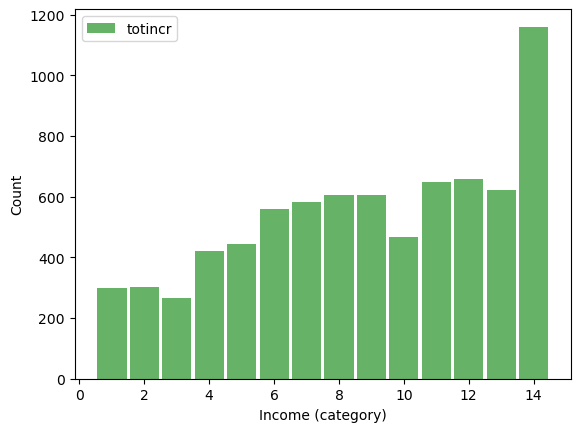

In [74]:
# display a histogram for total income
hist = thinkstats2.Hist(resp.totincr)
thinkplot.Hist(hist, label='totincr', color = 'Green')
thinkplot.Config(xlabel='Income (category)', ylabel='Count')

Make a histogram of age_r, the respondent's age at the time of interview.

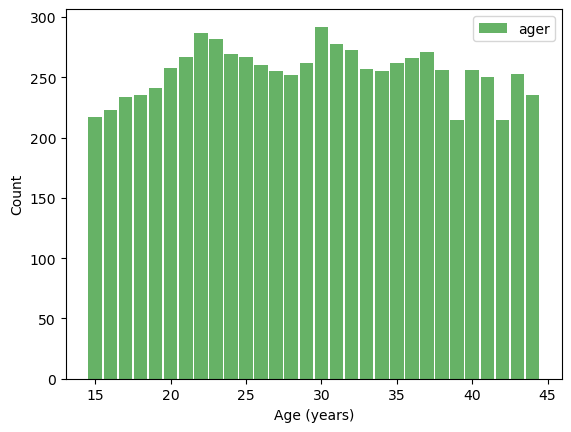

In [73]:
# display a histogram for age of the respondent
hist = thinkstats2.Hist(resp.ager)
thinkplot.Hist(hist, label='ager', color = 'Green')
thinkplot.Config(xlabel='Age (years)', ylabel='Count')

Make a histogram of numfmhh, the number of people in the respondent's household.

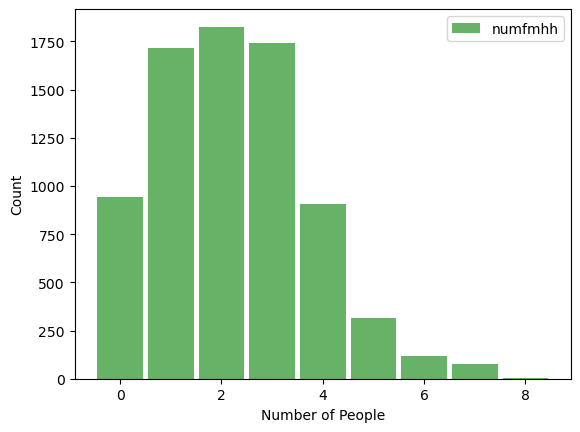

In [72]:
# display a histogram for the number of people in the respondent's household
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh', color = 'Green')
thinkplot.Config(xlabel='Number of People', ylabel='Count')

Make a histogram of parity, the number of children borne by the respondent. How would you describe this distribution?

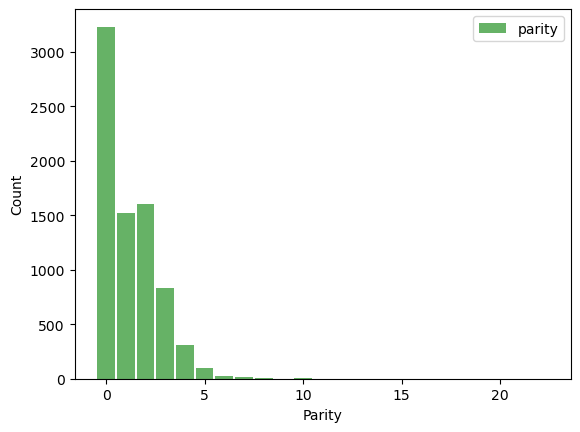

In [71]:
# display a histogram of parity of number of childern born by the respondent
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity', color = 'Green')
thinkplot.Config(xlabel='Parity', ylabel='Count')

According to the results of the histogram, the display is a positive distribution and skews to the right.

Use Hist.Largest to find the largest values of parity.

In [55]:
# find the 10 largest values of parity using 'hist.Largest'
hist.Largest(10)

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Let's investigate whether people with higher income have higher parity. Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question. But for now let's take it at face value.

Use totincr to select the respondents with the highest income (level 14). Plot the histogram of parity for just the high income respondents.

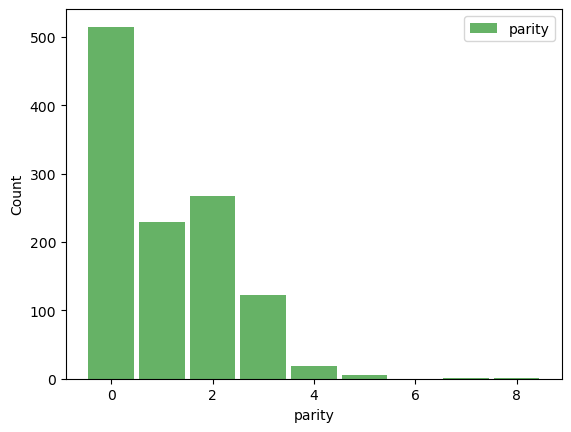

In [67]:
# plot a histogram of parity for high income respondents
high_income = resp[resp.totincr == 14]
hist = thinkstats2.Hist(high_income.parity)
thinkplot.Hist(hist, label='parity', color = 'Green')
thinkplot.Config(xlabel='parity', ylabel='Count')

Find the largest parities for high income respondents.

In [57]:
# using the same 'hist.Largest' to find the 10 largest parities
hist.Largest(10)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean parity for high income respondents and others.

In [69]:
# create a variable for lower income respondents
lower_income = resp[resp.totincr < 14]
# compare the means of the two income groups
rich.parity.mean(), lower_income.parity.mean()

(1.0758620689655172, 1.2495758136665125)

Compute the Cohen effect size for this difference. How does it compare with the difference in pregnancy length for first babies and others?

In [70]:
CohenEffectSize(high_income.parity, lower_income.parity)

-0.1736750239002583

At -0.17, the difference of Cohen effect size for high income parity and lower income parity is negligible and the Cohen effect size is -0.12, thus showing that there is barely a difference bewteen income of respondents and pregnacy length, showing no correlation. 